In [1]:
# 필요모듈 import
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal,cdf
import matplotlib.pyplot as plt

# 변수 설정
TM=5/12
S0=50
E=50
rf=0.10 #per annum
sigma=0.40

# (a) 

## BSM pricing

In [2]:
# Black-Scholes-Merton European Put Pricing 함수 정의
def BSpricing_Put(St,E,rf,sigma,T):
    d1=(np.log(St/E)+(rf+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    
    P_BSM=E*np.exp(-rf*T)*si.norm.cdf(-d2,0,1)-St*si.norm.cdf(-d1,0,1)
    return P_BSM

# 유러피안 옵션의 가격을 블랙숄즈 모형을 통해 계산하여 출력 
euroPut_BSM=BSpricing_Put(S0,E,rf,sigma,TM)

print("BSM value of European put : $",euroPut_BSM)

BSM value of European put : $ 4.075980984787783


# < Binomial method >

## European Put option pricing

# (b) 

In [3]:
# 유러피안 풋 옵션의 Binomial method 함수를 정의
def europeanPut(M):
    dt=TM/M
    
    # q,u,d parameter들을 확률적 대칭성을 이용하여 지정해준다.
    q=0.5 #risk neutral 확률 
    u=np.exp((rf-0.5*sigma**2)*dt+sigma*np.sqrt(dt)) #up event
    d=np.exp((rf-0.5*sigma**2)*dt-sigma*np.sqrt(dt)) #down event
    
    ## stock의 binomial tree만들기
    stockTree=np.zeros((M+1,M+1))
    stockTree[0,0]=S0
    for i in range(1,M+1):
        stockTree[i,0]=stockTree[i-1,0]*u
        for j in range(1,i+1):
            stockTree[i,j]=stockTree[i-1,j-1]*d
    
    # final node에서의 Put option payoff 
    euroPut=np.zeros((M+1,M+1))
    for i in range(M+1):
        euroPut[M,i]=max(0,E-stockTree[M,i])
    
    # 유러피안 옵션의 가격을 risk neutrality를 평균낸 값으로 backward하게 계산한다. 
    for i in range(M-1,-1,-1):
        for j in range(i+1):
            euroPut[i,j]=np.exp(-rf*dt)*(q*euroPut[i+1,j]+(1-q)*euroPut[i+1,j+1])
    
    return euroPut[0,0]

In [4]:
euroPut20steps=europeanPut(20)

print("European option value of 20 binomial steps: ",euroPut20steps)

European option value of 20 binomial steps:  4.0458972945662275


# (c)

In [5]:
M=100

euroPutValue=np.zeros(M+1)

for i in range(1,M+1):
    euroPutValue[i]=europeanPut(i)
    
print("European option value of 100 binomial steps: ",euroPutValue[M])

European option value of 100 binomial steps:  4.076731351081519


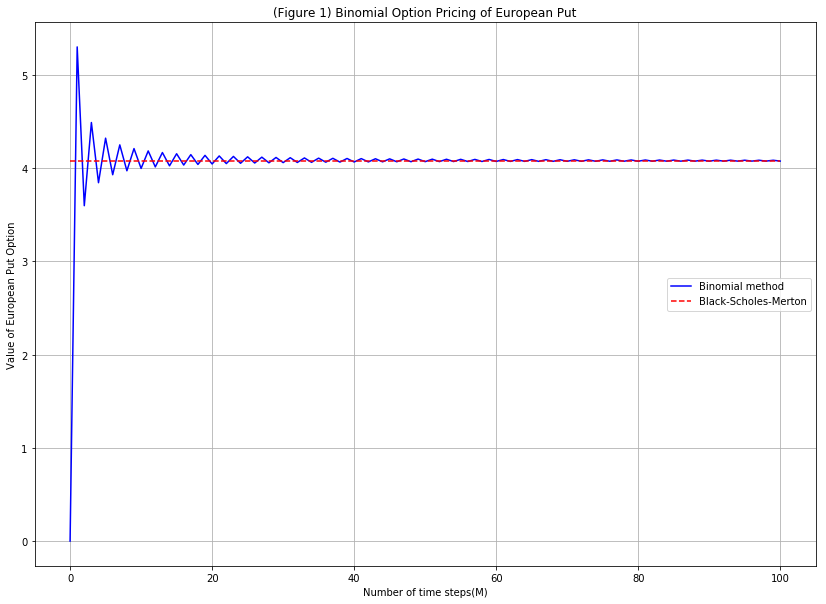

In [6]:
# 그래프 그리기
plt.figure(figsize=(14,10))
m=np.linspace(0,M,M+1)

euroPut_BSM_grape=np.zeros(shape=M+1)
for i in range(M+1):
    euroPut_BSM_grape[i]=euroPut_BSM

plt.plot(m,euroPutValue,color="b",label='Binomial method')
plt.plot(m,euroPut_BSM_grape,color="r",ls="--",label="Black-Scholes-Merton")
plt.legend(loc=7)
plt.xlabel('Number of time steps(M)')
plt.ylabel('Value of European Put Option')
plt.grid(True)
plt.axis('tight')
plt.title('(Figure 1) Binomial Option Pricing of European Put')
plt.show()

위 그래프를 보면 Binomial method로 계산한 유러피안 옵션의 가치는 약 \$4.07673로 블랙숄즈 모형으로 계산한 \$4.07598과 유사한 값에 수렴하고 있음을 알 수 있다.

# (d) 

## American Put option pricing

In [7]:
# American Put Option의 binomial method함수 정의
def americanPut(M):
    dt=TM/M
    
    q=0.5
    u=np.exp((rf-0.5*sigma**2)*dt+sigma*np.sqrt(dt))
    d=np.exp((rf-0.5*sigma**2)*dt-sigma*np.sqrt(dt))
    
    ## stock의 binomial tree만들기
    stockTree=np.zeros((M+1,M+1))
    stockTree[0,0]=S0
    for i in range(1,M+1):
        stockTree[i,0]=stockTree[i-1,0]*u
        for j in range(1,i+1):
            stockTree[i,j]=stockTree[i-1,j-1]*d
    
    # final node에서의 Put option payoff
    amePut=np.zeros((M+1,M+1))
    for i in range(M+1):
        amePut[M,i]=max(0,E-stockTree[M,i])
    
    # 아메리칸 Put option의 가격을 backward하게 계산한다.
    for i in range(M-1,-1,-1):
        for j in range(i+1):
            # 아메리칸 풋옵션은 조기행사 가능
            # 각 step에서의 평균내서 구한 값과 해당 시기 옵션 행사로 얻을 수 있는 payoff를 비교하여 큰 값을 저장 
            amePut[i,j]=max(0,E-stockTree[i,j],np.exp(-rf*dt)*(q*amePut[i+1,j]+(1-q)*amePut[i+1,j+1]))
        
    return amePut[0,0]    

In [8]:
amePutValue=np.zeros(M+1)

for i in range(1,M+1):
    amePutValue[i]=americanPut(i)
    
    
print("American option value of 100 binomial steps: ",amePutValue[M])

American option value of 100 binomial steps:  4.285550331548413


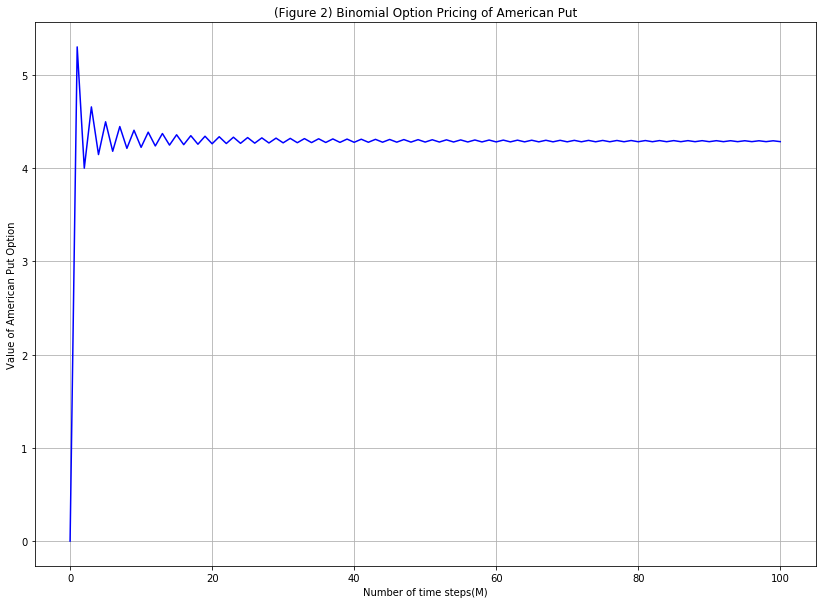

In [9]:
# 그래프 그리기
plt.figure(figsize=(14,10))
m=np.linspace(0,M,M+1)

plt.plot(m,amePutValue,color="b")
plt.xlabel('Number of time steps(M)')
plt.ylabel('Value of American Put Option')
plt.grid(True)
plt.axis('tight')
plt.title('(Figure 2) Binomial Option Pricing of American Put')
plt.show()

위 그래프를 보면 Binomial method로 계산한 아메리칸 풋 옵션의 가치는 약 \$4.28555로 유러피안 풋 옵션의 가치인 $4.076보다 더 높은 값에서 수렴하고 있는 것을 알 수 있다.

# (e)

c,d번의 두 그래프를 보면 Binomial method로 계산한 아메리칸 풋 옵션과 유러피안 풋 옵션의 pricing 값이 step의 수가 증가함에 따라 위 아래로 변동하다가 점점 하나의 값으로 수렴하고 있다. 

즉, 결과값이 증감을 반복하며 변동하며 수렴하므로 convergence monotonic하지않다.